# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** MUHAMMAD RAFI ILHAM
- **Email:** mrafilham83@gmail.com
- **ID Dicoding:** rafilham

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Berdasarkan Ketgori Produk, Produk apa yang paling banyak dan juga paling sedikit terjual?
- Pertanyaan 2: Bagaimana laju performa dari penjualan platform E-Commerce pada tahun 2018?
- Pertanyaan 3: Berdasarkan pelayanan yang diberikan e-commerce, Bagaimana penilaian atau *rating* yang diberikan oleh customer?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
#Load customers tabel
customers_df = pd.read_csv("data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
#Load geolocation tabel
geolocation_df = pd.read_csv("data/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
#Load order_items tabel
order_items_df = pd.read_csv("data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
#Load order_payments tabel
order_payments_df = pd.read_csv("data/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
#Load order_reviews tabel
order_reviews_df = pd.read_csv("data/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
#Load orders tabel
orders_df = pd.read_csv("data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
#Load product_category_name_translation tabel
product_category_name_df = pd.read_csv("data/product_category_name_translation.csv")
product_category_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
#Load products tabel
products_df = pd.read_csv("data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
#Load sellers tabel
sellers_df = pd.read_csv("data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

1. Menilai Data customers_df

In [11]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


tidak seperti pada latihan, bisa kita liat bahwa setiap kolom memiliki data yang sama semua (kemungkinan tidak ada missing value)

In [12]:
#Checking data if any missing value
customers_df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

data customers_df tidak memiliki missing value

In [13]:
#Checking if any duplicated data
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [14]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [15]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


2. Menilai Data geolocation_df

In [16]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


data kedua masih terlihat tidak adanya data yang kosong atau salah tipe data

In [17]:
#Checking data if any missing value
geolocation_df.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

data tidak memiliki missing value

In [18]:
#Checking if any duplicated data
print("Jumlah duplikasi: ",geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


dari data geolocation_df kita bisa menemukan adanya duplikasi pada data sebanyak 261831

In [19]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


dari pengecekan secara ringkas dengan parameter statistik menggunakan describe tidak ditemukan keanehan pada data geolocation_df

In [20]:
geolocation_df.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


3. Menilai order_items

In [21]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


terdapat kesalahan tipe data pada kolom shipping_limit_date, seharusnya menggunakan datetime

In [22]:
#Checking data if any missing value
order_items_df.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

dari data order_items_df tidak memiliki missing value

In [23]:
#Checking if any duplicated data
print("Jumlah duplikasi: ",order_items_df.duplicated().sum())

Jumlah duplikasi:  0


tidak terdapat data yang terduplikasi

In [24]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


tidak memiliki keanehan pada hasil describe diatas

In [25]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


4. Menilai order_payments

In [26]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Dari data diatas tidak terdapat tipe data yang salah dan dari jumlah per kolom nya sama semua

In [27]:
#Checking data if any missing value
order_payments_df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

tidak terdapat missing value pada order_payments_df

In [28]:
#Checking if any duplicated data
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


dari data diatas tidak terdapat duplikasi data

In [29]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [30]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


dari data diatas tidak adanya keanehan dengan menggunakan method describe()

5. Menilai order_reviews

In [31]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


terlihat ada beberapa kolom yang tidak memiliki jumlah data yang seharusnya ini mungkin terdapat missing values dan juga terdapat kesalahan tipe data pada kolom **review_creation_date** serta **review_answer_timestamp** seharusnya menggunakan datetime

In [32]:
#Checking data if any missing value
order_reviews_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

bisa dilihat bahwa pada data order_reviews terdapat missing value pada kolom review_comment_title sebanyak 87.656 dan review_comment_message sebanyak 58.247

In [33]:
#Checking if any duplicated data
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


tidak terdapat duplikasi data pada order_reviews

In [34]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [35]:
order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


tidak ada keanehan berdasarkan parameter parameter diatas dengan method describe()

6. Menilai orders_df

In [36]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


terdapat ketidaksamaan jumlah data pada beberapa kolom, kemungkinan terdapat missing value, dan juga terdapat kesalahan tipe data pada kolom **order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date** 

In [37]:
#Checking data if any missing value
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

terdapat missing value pada data diatas di kolom kolom **order_approved_at** sebanyak **160**, **order_delivered_carrier_date** sebanyak **1783** dan **order_delivered_customer_date** sebanyak **2965** tetapi ini dapat disebabkan karena terdapat perbedaan pada order_status.

In [38]:
#Checking if any duplicated data
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


dari data diatas tidak terdapat duplikasi data

In [39]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [40]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


tidak terdapat keanehan pada data yang ditampilkan menggunakan method describe()

7. Menilai product_category

In [41]:
product_category_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


tidak terdapat kesalahan tipe data pada kolom kolom di data diatas

In [42]:
#Checking data if any missing value
product_category_name_df.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

data diatas tidak memiliki missing value

In [43]:
#Checking if any duplicated data
print("Jumlah duplikasi: ", product_category_name_df.duplicated().sum())

Jumlah duplikasi:  0


data diatas tidak memiliki duplikasi data

In [44]:
product_category_name_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [45]:
product_category_name_df.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


dari data diatas tidak memiliki keanehan dengan menggunakan method describe() untuk mengecek nya

8. Menilai products_df

In [46]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


dari data diatas tidak terdapat tipe data yang salah tetapi terlihat seperti ada missing value

In [47]:
#Checking data if any missing value
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

terdapat missing value di hampir semua kolom yang ada pada data diatas

In [48]:
#Checking if any duplicated data
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


data diatas tidak terdapat duplikasi data

In [49]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [50]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


dari data diatas tidak terdapat keanehan yang bisa ditemukan

9. Menilai sellers_df

In [51]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


dari data diatas tidak terdapat jumlah data dan tipe data yang salah

In [52]:
#Checking data if any missing value
sellers_df.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

tidak terdapat missing value pada data

In [53]:
#Checking if any duplicated data
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


tidak terdapat duplikasi data pada data diatas

In [54]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [55]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


dari data diatas tidak ditemukan keanehan menggunakan method describe()

### Cleaning Data

**DATA DUPLIKAT**

Berdasarkan hasil pencarian duplicate data, data yang memiliki penduplikasian data terdapat atau ditemukan pada geolocation_dataset.csv, tetapi dikarenakan pada kolom **geolocation_city** dan **geolocation_state** value tertingginya yaitu Sao Paulo maka tidak perlu dilakukan drop

**MISSING VALUE**

Menangani Missing Value **review_comment_title** dan juga **review_comment_message**

In [56]:
order_reviews_df[order_reviews_df.review_comment_title.isnull()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [57]:
order_reviews_df.review_comment_title.value_counts()

review_comment_title
Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: count, Length: 4527, dtype: int64

In [58]:
order_reviews_df[order_reviews_df.review_comment_title.isnull()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [59]:
order_reviews_df.review_comment_message.value_counts()

review_comment_message
Muito bom                                                                                                                                                                                              230
Bom                                                                                                                                                                                                    189
muito bom                                                                                                                                                                                              122
bom                                                                                                                                                                                                    107
Recomendo                                                                                                                                                            

Kita bisa missing value pada data diatas dengan "no comment" saja menggunakan method fillna()

In [60]:
order_reviews_df.fillna(value="no comment", inplace=True)

Mengecek kembalik order_reviews

In [61]:
order_reviews_df.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

**TIPE DATA**

Mengganti tipe data ke date time pada kolom shipping_limit_date pada order_items_df

In [62]:
datetime_order_items = ["shipping_limit_date"]

for column in datetime_order_items:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

Mengecek kembalik data

In [63]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Mengganti tipe data ke date time pada kolom review_creation_date pada order_items_df dan review_answer_timestamp pada order_reviews_df

In [64]:
datetime_order_reviews = ["review_creation_date","review_answer_timestamp"]

for column in datetime_order_reviews:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

Mengecek kembali data

In [65]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


Mengganti tipe data ke date time pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date pada orders_df

In [66]:
datetime_orders = [
  "order_purchase_timestamp",
  "order_approved_at",
  "order_delivered_carrier_date",
  "order_delivered_customer_date",
  "order_estimated_delivery_date"
]

for column in datetime_orders:
  orders_df[column] = pd.to_datetime(orders_df[column])

Mengecek kembali data

In [67]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


## Exploratory Data Analysis (EDA)

### Explore ...

**MENCOBA MELIHAT JUMLAH CUSTOMER TERBANYAK DARI CITY DAN STATE**

In [68]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [69]:
customers_city = customers_df.groupby(by="customer_city").customer_unique_id.nunique().sort_values(ascending=False).reset_index()
customers_city.head(10)

,customer_city,customer_unique_id
0,sao paulo,14984
1,rio de janeiro,6620
2,belo horizonte,2672
3,brasilia,2069
4,curitiba,1465
5,campinas,1398
6,porto alegre,1326
7,salvador,1209
8,guarulhos,1153
9,sao bernardo do campo,908


bisa dilihat sao paulo merupakan kota yang memiliki jumlah customers paling banyak

In [70]:
customers_states = customers_df.groupby(by="customer_state").customer_unique_id.nunique().sort_values(ascending=False).reset_index()
customers_states.head(10)

,customer_state,customer_unique_id
0,SP,40302
1,RJ,12384
2,MG,11259
3,RS,5277
4,PR,4882
5,SC,3534
6,BA,3277
7,DF,2075
8,ES,1964
9,GO,1952


bisa kita ketahui bahwa customers terbanyak berada pada state SP

**MENCOBA MELIHAT JENIS ATAU TIPE PAYMENT TERBANYAK ATAU TERPOPULER**

In [71]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [72]:
payment_type_list = order_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).reset_index()
payment_type_list.head(10)

,payment_type,order_id
0,credit_card,76505
1,boleto,19784
2,voucher,3866
3,debit_card,1528
4,not_defined,3


tipe pembayaran yang paling banyak digunakan atau paling populer terletak pada credit card

**MENCOBA MELIHAT/ MENGETAHUI WAKTU PENGIRIMAN TIAP ORDER**

In [73]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
65227,2d1e8425264efd28cc7993f5a8ab2c63,c03824cdf2dbec0c161f58640c655398,delivered,2017-12-04 10:50:18,2017-12-04 16:32:05,2017-12-05 15:07:52,2018-01-10 23:09:20,2018-01-04
70617,370e2e6c1a9fd451eb7f0852daa3b006,55f7adf99fd2a2c01af34e2dfa272c9f,delivered,2017-03-11 18:34:44,2017-03-11 18:34:44,2017-03-15 07:34:16,2017-03-30 15:47:50,2017-04-10
93198,c2ed06437a123b8c578ce63581930191,65897a02756a5919541baf6e683f7282,delivered,2017-03-18 16:32:13,2017-03-18 16:32:13,2017-03-23 16:34:25,2017-03-30 14:38:45,2017-04-26
14954,364d9bdfd849c1092558945df309c280,6cda1d04141717b4d21a31c101d1414c,delivered,2017-05-09 20:24:50,2017-05-09 20:42:20,2017-05-10 13:23:01,2017-05-11 10:04:55,2017-05-17
94459,07e8c8c7545c3cf6386eaf464b1e8365,e26b9c4b85923dcabcf02312427b75f5,delivered,2018-08-08 12:51:29,2018-08-08 13:05:18,2018-08-24 14:13:00,2018-08-30 22:04:52,2018-08-29


In [74]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

In [75]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
23557,0bfe55f7a11b408e6519d50eb874b331,26a5ebc887e2d4d92ef470d35c78f280,delivered,2018-04-02 20:46:38,2018-04-02 21:09:26,2018-04-16 19:47:33,2018-04-23 18:36:25,2018-04-20,7.0
28113,28e418b320f6b759b6aea79734f165e5,97697c5f77b484cb0cec9eaa81c679d5,delivered,2017-09-02 15:09:09,2017-09-02 15:24:04,2017-09-07 00:04:26,2017-09-19 19:16:57,2017-09-27,13.0
57128,f44845a8eeec9bf829093ad92c846c09,507928d99b23819eb6e79e0772dbbadf,delivered,2018-07-11 13:32:28,2018-07-11 13:50:22,2018-07-12 15:33:00,2018-07-25 01:21:59,2018-08-08,12.0
75945,024a19cc498cc1a9efcf675d1ca465c3,54ae421973032c25067cdf03e04be610,delivered,2018-04-03 16:35:22,2018-04-03 17:28:43,2018-04-06 20:42:54,2018-04-30 17:12:19,2018-04-26,24.0
41821,1ca74ef1a063b31008ef4af64cdaa485,bacfd6acca2b3560dba225f481256b45,delivered,2017-09-11 22:48:26,2017-09-11 23:03:55,2017-09-13 19:27:51,2017-09-16 16:49:55,2017-10-03,3.0


bisa dilihat terdapat kolom baru yaitu delivery_time yang memuat waktu pengiriman tiap order dalam satuah hari (dibagi 86400)

**MENCOBA MELIHAT CUSTOMER YANG ACTIVE DAN NON ACTIVE**

In [76]:
customer_id_in_orders_df =  orders_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
80932,60c3b5e9a49680687f57dec245ff4878,0fbad5f5683626b3c234ef751d2ff166,96400,bage,RS,Active
9932,4b6525e692ac07e96bb6af495504f6fb,ece908ca0502def5dd56deca8a5c67d5,7600,mairipora,SP,Active
30898,d60805f01a84d8b2d5acae981e3c770f,2354fd276b3909d8b5ab740063adf118,59500,macau,RN,Active
16069,119964566e4c0cbef2dac4d8a4291338,e24fa7f40f8975819f43612ca3c3c3ec,58306,bayeux,PB,Active
53723,36a55a60f18b9cf47ec2b374f2c097ea,56c355e615aa216a8c404c4f3d22383c,27335,barra mansa,RJ,Active


In [77]:
customers_df.groupby(by="status").customer_id.count()

status
Active    99441
Name: customer_id, dtype: int64

**MELAKUKAN JOINING ATAU MENGGABUNGKAN TABEL PRODUCTS DAN PRODUCTS CATEGORY**

In [78]:
products_merge_df = pd.merge(
    left=products_df,
    right=product_category_name_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
products_merge_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [79]:
products_merge_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).reset_index().head(10)

,product_category_name,product_id
0,cama_mesa_banho,3029
1,esporte_lazer,2867
2,moveis_decoracao,2657
3,beleza_saude,2444
4,utilidades_domesticas,2335
5,automotivo,1900
6,informatica_acessorios,1639
7,brinquedos,1411
8,relogios_presentes,1329
9,telefonia,1134


**MELAKUKAN JOINING ATAU MENGGABUNGKAN TABEL ORDER_PAYMENTS DAN ORDER_REVIEWS**

In [80]:
order_payments_reviews_df = pd.merge(
    left=order_payments_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_payments_reviews_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,no comment,no comment,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,no comment,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,no comment,no comment,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,no comment,no comment,2017-12-21,2017-12-22 01:10:39


**MELAKUKAN JOINING ATAU MENGGABUNGKAN TABEL CUSTOMERS DAN ORDERS**

In [81]:
cust_orders_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
cust_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,14.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,3.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,10.0


**MELAKUKAN JOINING ATAU MENGGABUNGKAN TABEL CUSTS_ORDERS DAN ORDERS_PAYMENTS_REVIEWS**

In [82]:
customers_new_df = pd.merge(
    left=cust_orders_df,
    right=order_payments_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_new_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,no comment,no comment,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,no comment,no comment,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,no comment,no comment,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,no comment,no comment,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


**MELAKUKAN JOINING ATAU MENGGABUNGKAN ORDER_ITEMS DAN SELLERS**

In [83]:
order_items_sellers_df = pd.merge(
    left=order_items_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
order_items_sellers_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


**MELAKUKAN JOINING ATAU MENGGABUNGKAN TABEL PRODUCTS_MERGE DAN ORDER_ITEMS_SELLERS**

In [84]:
sellers_new_df = pd.merge(
    left=products_merge_df,
    right=order_items_sellers_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sellers_new_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


**MELAKUKAN JOINING ATAU MENGGABUNGKAN SEMUA TABEL**

In [85]:
all_df = pd.merge(
    left=customers_new_df,
    right=sellers_new_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,40.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP


In [86]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   customer_zip_code_prefix       119143 non-null  int64         
 3   customer_city                  119143 non-null  object        
 4   customer_state                 119143 non-null  object        
 5   status                         119143 non-null  object        
 6   order_id                       119143 non-null  object        
 7   order_status                   119143 non-null  object        
 8   order_purchase_timestamp       119143 non-null  datetime64[ns]
 9   order_approved_at              118966 non-null  datetime64[ns]
 10  order_delivered_carrier_date   117057 non-null  datetime64[ns]
 11  

**MELIHAT JUMLAH PENJUAL YANG PALING POPULER DI KOTA DAN STATE**

In [87]:
sellers_cities = all_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).reset_index()
sellers_cities.head(10)

,seller_city,seller_id
0,sao paulo,694
1,curitiba,127
2,rio de janeiro,96
3,belo horizonte,68
4,ribeirao preto,52
5,guarulhos,50
6,ibitinga,49
7,santo andre,45
8,campinas,41
9,maringa,40


kota yang paling banyak penjual nya yaitu sao paulo

In [88]:
sellers_states = all_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).reset_index()
sellers_states.head(10)

,seller_state,seller_id
0,SP,1849
1,PR,349
2,MG,244
3,SC,190
4,RJ,171
5,RS,129
6,GO,40
7,DF,30
8,ES,23
9,BA,19


kota yang paling banyak penjual nya yaitu SP

**Membuat file baru hasil merge all data**

In [89]:
all_df.to_csv("dashboard/all_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berdasarkan Ketgori Produk, Produk apa yang paling banyak dan juga paling sedikit terjual?

In [90]:
products_summary = all_df.groupby("product_category_name_english")["product_id"].count().reset_index()
products_summary = products_summary.rename(columns={"product_id": "products_count"})
products_summary = products_summary.sort_values(by="products_count", ascending=False)

products_summary.head(10)

,product_category_name_english,products_count
7,bed_bath_table,11988
43,health_beauty,10032
65,sports_leisure,9004
39,furniture_decor,8832
15,computers_accessories,8150
49,housewares,7380
70,watches_gifts,6213
68,telephony,4726
42,garden_tools,4590
5,auto,4400


bisa dilihat product dengan jumlah jual terbanyak terdapat pada product bernama bed_bath_table

C:\Users\RAFI\AppData\Local\Temp\ipykernel_4184\2590995961.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="products_count", y="product_category_name_english", data=products_summary.head(5), palette=colors, ax=ax[0])
C:\Users\RAFI\AppData\Local\Temp\ipykernel_4184\2590995961.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="products_count", y="product_category_name_english", data=products_summary.sort_values(by="products_count", ascending=True).head(5), palette=colors, ax=ax[1])


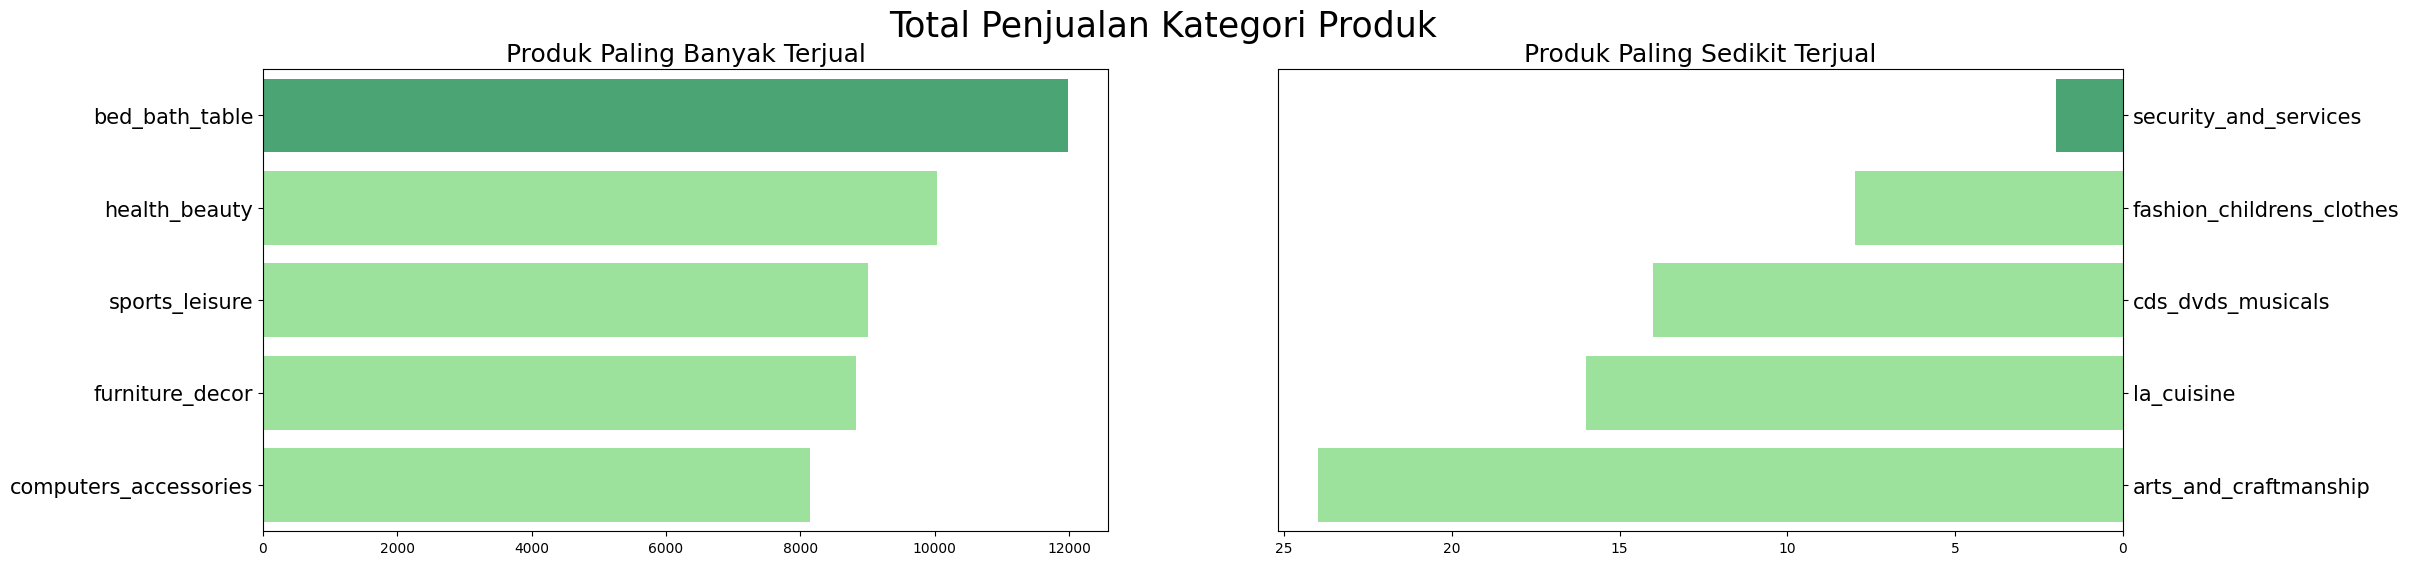

In [91]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#3CB371", "#90EE90", "#90EE90", "#90EE90", "#90EE90"]  # Mengubah warna menjadi hijau muda untuk grafik pertama

sns.barplot(x="products_count", y="product_category_name_english", data=products_summary.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk Paling Banyak Terjual", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="products_count", y="product_category_name_english", data=products_summary.sort_values(by="products_count", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk Paling Sedikit Terjual", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Total Penjualan Kategori Produk", fontsize=25)
plt.show()

### Pertanyaan 2: Bagaimana laju performa dari penjualan platform E-Commerce pada tahun 2018?

In [92]:
monthly_orders_df = all_df.resample(rule='M', on='order_approved_at').agg({
    "order_id": "nunique",
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%B') #mengubah format order_approved_at menjadi Tahun-Bulan
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
}, inplace=True)

C:\Users\RAFI\AppData\Local\Temp\ipykernel_4184\1965711998.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = all_df.resample(rule='M', on='order_approved_at').agg({


In [93]:
monthly_orders_df = monthly_orders_df.sort_values('order_count').drop_duplicates('order_approved_at', keep='last')

In [94]:
monthly_orders_df.sort_values(by='order_count', ascending=False)

,order_approved_at,order_count
14,November,7395
18,March,7288
16,January,7187
20,May,7066
19,April,6778
17,February,6706
23,August,6620
22,July,6176
21,June,6164
15,December,5832


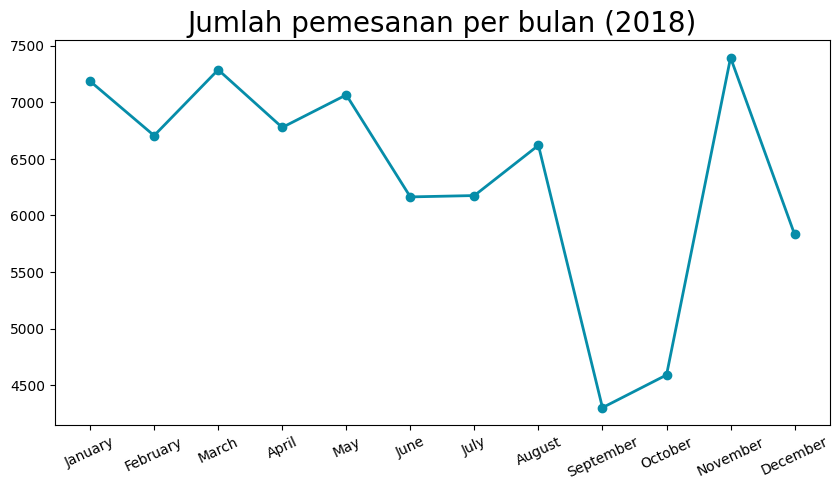

In [95]:
# Membuat mapping untuk bulan numerik
month_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
month_mapping = {month: i for i, month in enumerate(month_names, start=1)}

# Menambahkan kolom bulan numerik dan mengurutkan DataFrame berdasarkan bulan numerik
monthly_orders_df['month_numeric'] = monthly_orders_df['order_approved_at'].map(month_mapping)
monthly_orders_df = monthly_orders_df.sort_values('month_numeric').drop('month_numeric', axis=1)

#Visualisasi
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_approved_at"],
    monthly_orders_df["order_count"],
    marker='o', 
    linewidth=2,
    color="#068DA9"
)
plt.title("Jumlah pemesanan per bulan (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.show()

bisa dilihat dari performa grafik jumlah order pada tahun 2018 diatas, dimulai dari bulan Januari hingga Desember, Mengalami penurunan dan penaikan pada awal tahun serta mengalami **penurunan** yang cukup **signifikan** dari bulan agustus hingga september, namun mengalami peningkatan yang signifikan pada bykan November

### Pertanyaan 3: Berdasarkan pelayanan yang diberikan e-commerce, Bagaimana penilaian atau *rating* yang diberikan oleh customer?

C:\Users\RAFI\AppData\Local\Temp\ipykernel_4184\2488453653.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


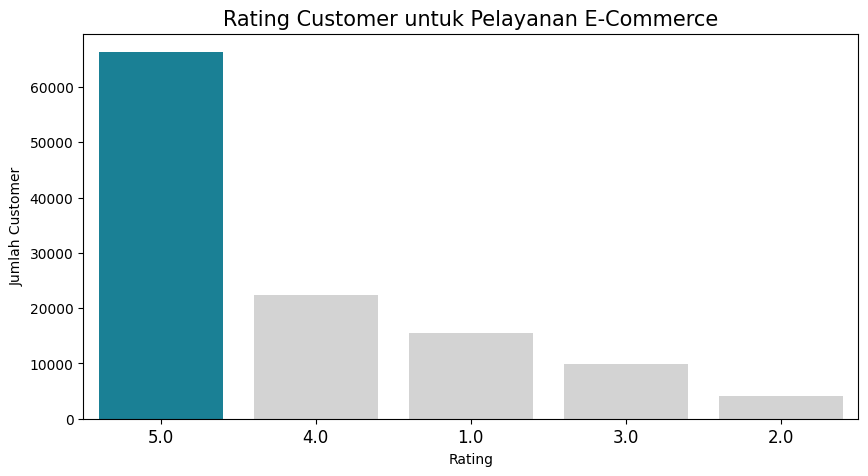

In [96]:
review_scores = all_df['review_score'].value_counts().sort_values(ascending=False)
popular_scores = review_scores.idxmax()

# Mengatur warna grafik
colors = ["#068DA9" if score == popular_scores else "#D3D3D3" for score in review_scores.index]

# Visualisasi
plt.figure(figsize=(10, 5))
sns.barplot(
  x=review_scores.index, 
  y=review_scores.values, 
  order=review_scores.index,
  palette=colors
)

plt.title("Rating Customer untuk Pelayanan E-Commerce", fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Jumlah Customer")
plt.xticks(fontsize=12)
plt.show()

## Conclusion

* Conclution pertanyaan 1: Berdasarkan hasil analisis serta hasil visualisasi, Kategori Produk yang paling banyak dijual atau paling laris ialah bed_bath_table dan juga produk yang paling tidak banyak terjual atau paling sedikit dibeli adalah produk security_and_services

* Conclution pertanyaan 2: Berdasarkan hasil visaliasi jumlah pemesanan per bulan pada tahun 2018 bisa dilihat dari performa grafik dimulai dari bulan Januari hingga Desember,Pada awal tahun, Performa Mengalami penurunan dan penaikan pada januari hingga mei serta mengalami penurunan yang cukup signifikan dari bulan agustus hingga september, namun mengalami peningkatan yang signifikan pada bulan November lalu mengalami penurunan kembali pada bulan desember

* Conclution pertanyaan 3: Berdasarkan hasil visualisasi mengenai kepuasan pelanggan, mayoritas rating yang diberikan pelanggan adalah  5 diikuti pada posisi ke-2, pelanggan memberikan nilai atau rating sebesar 4. Dengan demikian bisa disimpulkan bahwa pelanggan puas terhadap layanan e-commerce